In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [14]:
image = cv2.imread('contour.png')
if image is None:
    print("The image is not uploaded sucessfully")
else:
    print('The image is uploaded sucessfully')

image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

The image is uploaded sucessfully


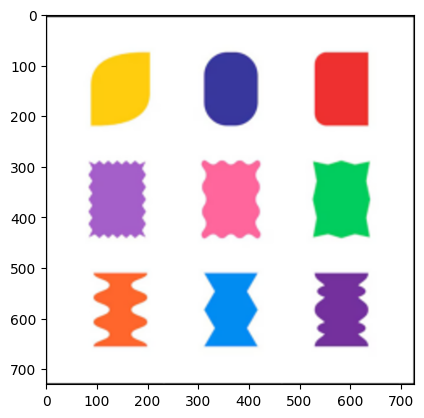

In [15]:
plt.imshow(image_rgb)

#### Contour is a technique in which we will provide a outside edge only to a closed object. Mainly used for object detection in a image

#### Steps to apply contours:-
--> convert the image to grayscale image

--> Apply thresholding or canny edge detection or color_masking

--> Then apply contour on the copy image of the original image

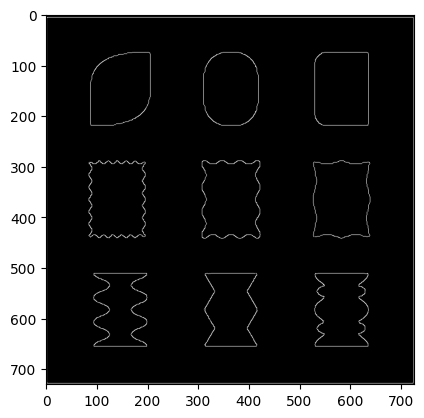

In [16]:
gray = cv2.Canny(image_grey, 80, 150)  ## --> to apply canny we need to specify the upper and lower bound. This will help wheteher to 
                                        ## accept or reject the detected edge

plt.imshow(gray, cmap='grey')

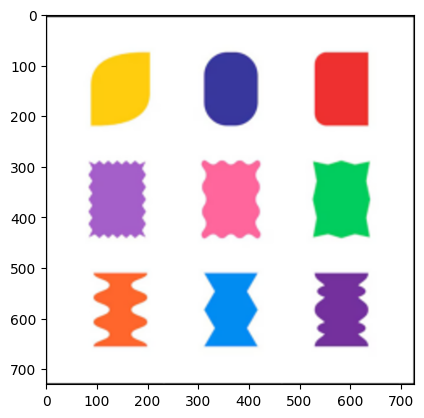

In [21]:
contour_image = image_rgb.copy()
plt.imshow(contour_image)

### Below is performed the contour with canny edge detection

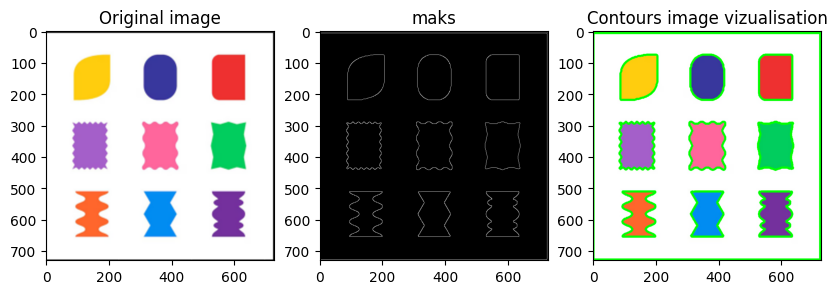

In [22]:
contours,  hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )

# MODE - hierarchy relationship between contours
# method - contours points are stored.

contour_image_visualize = cv2.drawContours(contour_image, contours, -1, (0,255,0),5)
## -1 is used to draw all the images with contour. Basically it represents the serial number of image whose contour needs to be printed

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(gray, cmap='grey')
plt.title("maks")  



plt.subplot(1,3,3)
plt.imshow(contour_image_visualize)
plt.title("Contours image vizualisation")

plt.show()

#### Thresholding + Contours

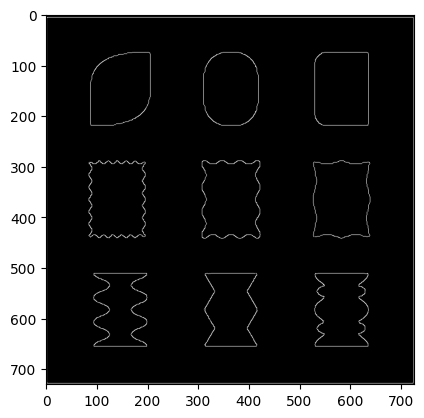

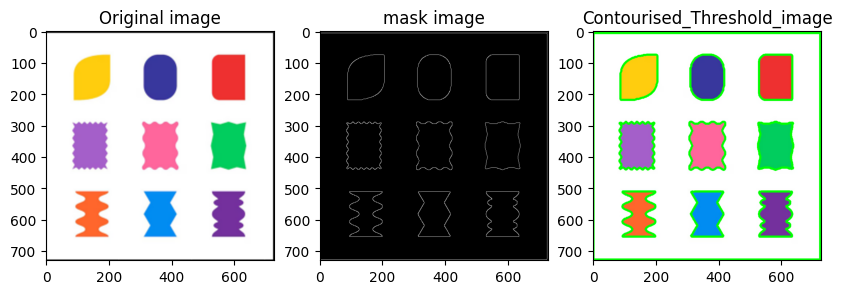

In [28]:
retval,binary = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)  ## it means the pixels which value 200, make it as 255

contour_image = image_rgb.copy()
plt.imshow(binary,cmap = 'grey')

contours, hierarchy = cv2.findContours(binary,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contour_Threshold_image = cv2.drawContours(contour_image,contours,-1,(0,255,0),5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image_rgb)

plt.subplot(1,3,2)
plt.title('mask image')
plt.imshow(binary,cmap='grey')

plt.subplot(1,3,3)
plt.title('Contourised_Threshold_image')
plt.imshow(contour_Threshold_image)

plt.show()


#### Imp point to keep in mind
Always whenever we will create and draw contours we need a grayscale image. The gray scale image can be obtainbed either by applying:-

by directly giving the hrayscale image

canny edge detection

thresholding
 
color mask creation using inRange funcion with hsv and by creating upper and lower bounds

#### Color Masking + Contours

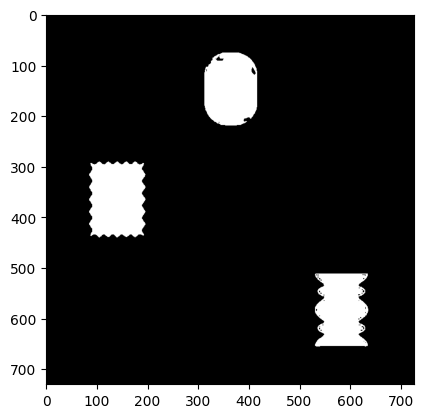

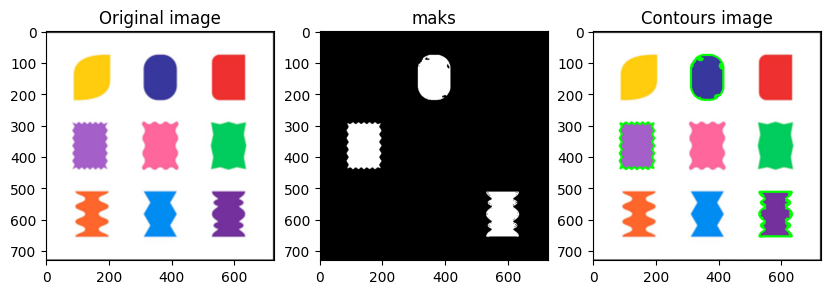

In [31]:
lower_bound = np.array([120, 80, 0], dtype=np.uint8)
upper_bound = np.array([160, 185, 255], dtype=np.uint8)

image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_hsv,lower_bound,upper_bound)

plt.imshow(mask, cmap='grey')

contours, hierarchy = cv2.findContours(mask,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image_rgb.copy()
mask_contour_image = cv2.drawContours(contour_image,contours,-1,(0,255,0),5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("maks")

plt.subplot(1,3,3)
plt.imshow(mask_contour_image)
plt.title("Contours image")

plt.show()



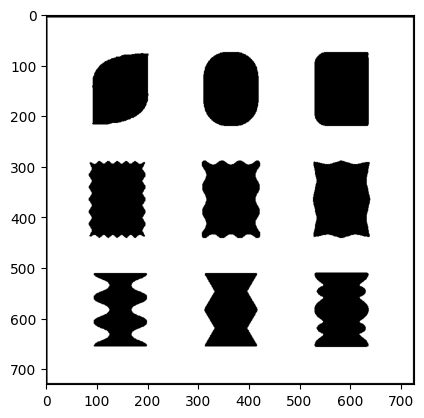

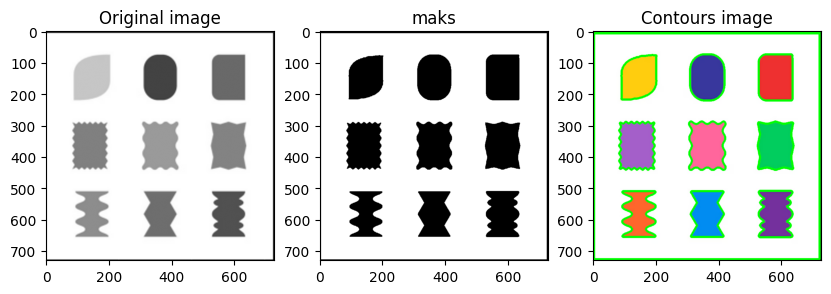

In [33]:
lower_bound = np.array([200], dtype=np.uint8)
upper_bound = np.array([255], dtype=np.uint8)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mask = cv2.inRange(image_grey, lower_bound, upper_bound)

plt.imshow(mask, cmap='grey')

contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#MODE - hierarchy relationship between contours
# method - contours points are stored.

contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_grey, cmap='grey')
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("maks")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()

32


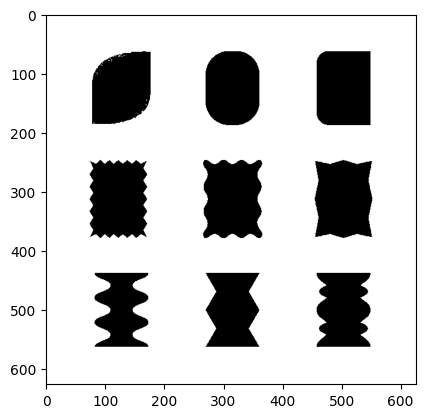

In [20]:
import numpy as np

lower_bound = np.array([200], dtype=np.uint8)
upper_bound = np.array([255], dtype=np.uint8)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mask = cv2.inRange(image_grey, lower_bound, upper_bound)

plt.imshow(mask, cmap='grey')

contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours = sorted(contours, key=cv2.contourArea,reverse=True)

print(len(sorted_contours))

contours = sorted_contours[1:10]

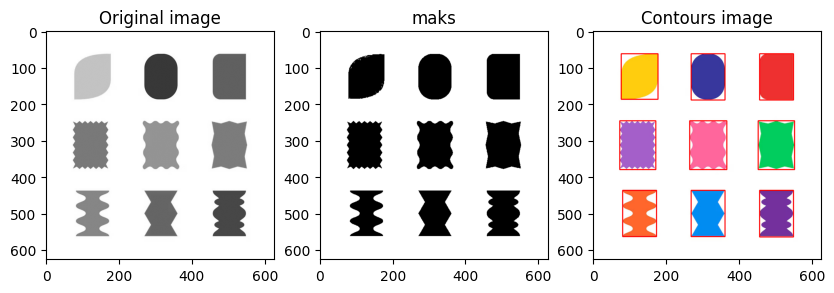

In [22]:
#MODE - hierarchy relationship between contours
# method - contours points are stored.
contour_image = image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(contour_image, (x,y), (x+w, y+h), (0,0,255), 2)


# cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 5)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_grey, cmap='grey')
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(mask, cmap='grey')
plt.title("maks")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours image")

plt.show()